## 선형회귀

- 선형회귀(Linear Regression) : 종속변수 $y$와 한 개 이상의 독립변수 $x$와의 선형 상관관계를 모델링하는 회귀분석 기법
- 일반적으로 예측을 목표하는 통계 분석으로 예측을 하는 방법에 핵심이 되는 개념이 바로 ‘추세선’

### 추세선
- 직선의 추세선 : y=ax+b와, 데이터 x와 y값을 통해 a(기울기)와 b(절편)값, 최적의 회귀 계수를 알아내는 것.
- $y=ax+b$꼴의 수식을 만들고 a와 b의 값을 찾아냄
- 좌표상에서 데이터의 분포와 앞으로의 변화를 가장 잘 설명할 수 있는 하나의 선을 그려내는 것이 궁극적인 목적

### 선형회귀 기초 수식
- 비용 함수(cost function) : 머신러닝에서 최소화해야 할 예측값과 실제값의 차이
- 가설 함수(hypothesis function) : 예측값을 예측하는 함수 $f(x)=h_{\theta}(x)$
    - $x$ : 함수 입력값
    - $\theta$ : 함수 결정값, 가중치 값($w_n$)

### 최소자승법

__1. 최소자승법 (Ordinary Least Squares)__
 - 임의의 추세선(=가설초기화)을 기준으로 분포한 x, y의 좌푯값의 차이(=잔차)를 제곱하여 모두 더한 값의 최소가 되는 지점
 - 잔차: 데이터값과 추세선과의 오차

__2. 추세선의 정확도, 표준오차와 회귀계수__
 - 데이터가 다르더라도 동일한 방정식과 회귀계수를 가질 수 있기 때문에, 표준오차의 차이를 확인하여 구분해 볼 수 있음.
     - 표준오차: 회귀선(=추세선)과 데이터 간 차이의 표준값, 회귀(직)선을 기준으로 데이터가 얼마나 잘 모여있거나 퍼져있는지를 표현한 개념
 - 표준오차(SE)가 크면 y값을 추정하는 회귀계수(=추세선)의 우연정도(P-value)가 커지므로 해당 추세선(=회귀식)의 설명력은 떨어짐

__3. 추세선의 정확도, 회귀계수와 t-value__
 - 독립변수와 종속변수 사이 양 또는 음의 상관관계가 전제되어야한다.
     - 두 변수 간의 관계가 없다면(기울기가 0) 의미가 없기 떄문에 검정하기 위해 t-test를 활용
     - t-test: 두 집단의 비교를 위한 평균과 표준편차의 비율 차이를 구하고, 차이가 우연인지 아닌지를 검정

__4. 회귀분석 결과표__
 - t값이 클수록 두 변수 간의 관계가 유의미

### 훈련/테스트 분할
- 훈련/테스트 분할(train/test split)
  - 학습 데이터셋(train dataset) : 머신러닝에서 데이터를 학습을 하기 위한 데이터셋
  - 테스트 데이터셋(test dataset) : 학습의 결과로 생성된 모델의 성능을 평가하기 위한 데이터셋
  - 모델이 새로운 데이터셋에도 일반화(generalize)하여 처리할 수 있는지를 확인하기 위함
  - 모델이 데이터에 과다적합(over-fit) : 생성된 모델이 특정 데이터에만 잘 맞아서 해당 데이터셋에 대해서는 성능을 발휘할 수 있지만 새로운 데이터셋에서는 전혀 성능을 낼 수 없음
  - 모델이 데이터에 과소적합(under-fit) : 기존 학습 데이터를 제대로 예측하지 못함

### 홀드아웃 메서드
- 홀드아웃 메서드(hold-out method) : 전체 데이터셋에서 일부를 학습 데이터와 테스트 데이터로 나누는 일반적인 데이터 분할 기법
  - 전체 데이터에서 랜덤하게 학습 데이터셋과 테스트 데이터셋을 나눔
  - 일반적으로 7:3 또는 8:2 정도의 비율

### 선형회귀의 성능 측정 지표
__MAE(Mean Absolute Error) : 평균 절대 잔차__
  - 모든 테스트 데이터에 대해 예측값과 실제값의 차이에 대해 절댓값을 구하고, 이 값을 모두 더한 후에 데이터의 개수만큼 나눈 결과

__MSE(Mean Squared Error) : 평균 제곱 오차__
  - 잔차의 제곱합을 2n으로 나눈 값

__RMSE(Root Mean Squared Error) : 평균 제곱근 오차__
  - 오차에 대해 제곱을 한 다음 모든 값을 더하여 평균을 낸 후 제곱근을 구하며, MAE보다 값의 차이가 큼
  - 차이가 크게 나는 값에 대해서 페널티를 주고 싶다면 RMSE 값을 사용

__결정계수(R-squared) : 두 개의 값의 증감이 얼마나 일관성을 가지는지 나타내는 지표__
  - 예측값이 크면 클수록 실제값도 커지고, 예측값이 작으면 실제값도 작아짐
  - 두 개의 모델 중 어떤 모델이 조금 더 상관성이 있는지를 나타낼 수 있지만, 값의 차이 정도가 얼마인지는 나타낼 수 없다는 한계가 있음

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(  # train_test_split : 훈련/테스트 데이터 분할 함수
    X, y, test_size=0.33, random_state=42)

In [2]:
# median_absolute_error : MAE를 구하는 함수
from sklearn.metrics import median_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

0.5

In [3]:
# mean_squared_error : RMSE를 구하는 함수
from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [4]:
# r2_score : 결정계수 구하는 함수
from sklearn.metrics import r2_score

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

### 경사하강법
- 경사하강법(gradient descent) : 경사를 하강하면서 수식을 최소화하는 매개변수의 $x$값을 찾아내는 방법
- 경사하강법에서 개발자가 결정해야하는 것
    - 학습률(learning rate) : $x_{new}=x_{old}-a\times(2x_{old})$
        - 반복 수행할 때마다 최솟값 변화
        - 값이 너무 작으면 많이 반복해도 원하는 최적값을 찾지 못함
        - 값이 너무 크면 발산하여 최솟값에 수렴하지 않거나 시간이 너무 오래 걸림
    - 반복(iteration)
        - 반복 횟수가 충분하지 않으면 최솟값을 찾지 못함
        - 반복 횟수가 너무 많으면 필요 없는 시간을 허비할 수 있음


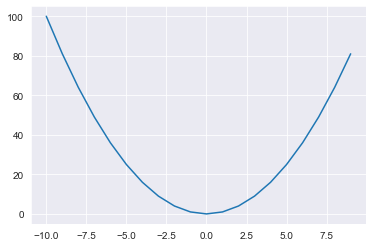

In [5]:
x = np.arange(-10, 10, 1)
f_x = x ** 2

plt.plot(x, f_x)
plt.show()

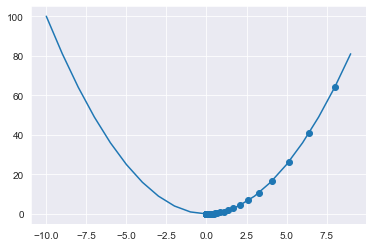

In [6]:
x_new = 10
derivative = []
y = []
learng_rate = 0.1

for i in range(100):
    old_value = x_new
    derivative.append(old_value - learng_rate * 2 * old_value)
    x_new = old_value - learng_rate * 2 * old_value
    y.append(x_new ** 2)
plt.plot(x, f_x)
plt.scatter(derivative, y)

plt.show()

- 경사하강법을 선형회귀로 구현

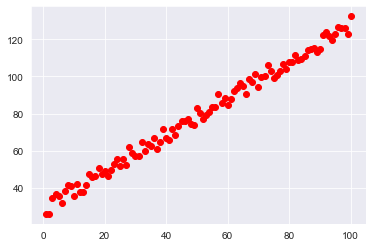

In [7]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)

    for i in range(0, numPoints):
        x[i][0] = 1  # 데이터 x의 상수항 1
        x[i][1] = i  # 데이터 x 값은 1씩 증가시킴
        y[i] = (i + bias) + random.uniform(0, 1) * variance  # 데이터 y에 bias 생성
    return x, y


x, y = gen_data(100, 25, 10)  # 100개의 데이터 생성

plt.plot(x[:, 1] + 1, y, "ro")  # 데이터 x와 y의 상관관계 그래프 작성
plt.show()

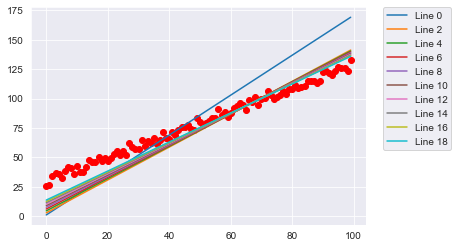

In [8]:
def gradient_descent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    theta_list = []
    cost_list = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
        if i % 250 == 0:
            theta_list.append(theta)
            cost_list.append(cost)
    return theta, np.array(theta_list), cost_list


m, n = np.shape(x)
numIterations = 5000
alpha = 0.0005
theta = np.ones(n)

theta, theta_list, cost_list = gradient_descent(
    x, y, theta, alpha, m, numIterations)

y_predict_step = np.dot(x, theta_list.transpose())
plt.plot(x[:, 1], y, "ro")
for i in range(0, 20, 2):
    plt.plot(x[:, 1], y_predict_step[:, i], label='Line %d' % i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

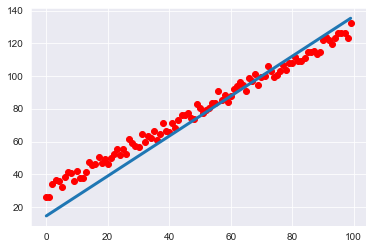

In [9]:
y_predict = np.dot(x, theta)
plt.plot(x[:, 1], y, "ro")
plt.plot(x[:, 1], y_predict, lw=3)
plt.show()

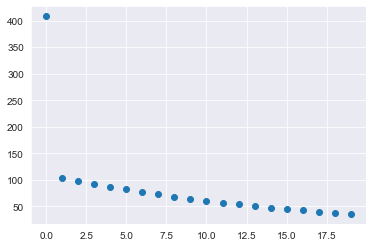

In [10]:
iterations = range(len(cost_list))

plt.scatter(iterations, cost_list)
plt.show()

## 보스턴 주택 가격 예측

- 목표 : 보스턴 주택 가격 데이터에 머신러닝 기반의 회귀 분석을 수행하여 주택 가격에 영향을 미치는 환경 변수를 확인하고, 그에 따른 주택 가격을 예측
- 데이터 : 사이킷런 내장 데이터셋(load_boston())
    - 사이킷런에서는 인종 관련한 윤리적 문제 때문에 곧 삭제될 예정으로 다른 방식으로 대체
- 분석 모델 구축 : 사이킷런의 선형 회귀 모델
- 목표 설정 : 주택에 관련한 변수를 독립변수 x로 설정하고, 주택 가격을 종속변수 y로 설정하여 머신러닝을 이용한 선형 회귀분석으로 주택 가격을 예측
- 사이킷런(scikit-learn)
    - 파이썬에서 머신러닝을 수행하기 쉽고 효율적인 개발 라이브러리 제공
    - 머신러닝에서는 속성을 나타내는 독립변수를 피처(feature), 종속변수를 클래스(class) 또는 타겟(target)이라고 함

In [11]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = pd.DataFrame(np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]),
                    columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                             'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                             'PTRATIO', 'B', 'LSTAT'])
target = raw_df.values[1::2, 2]

data.tail(8)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


> CRIM : 자치시(town)별 1인당 범죄율
> ZN : 25,000 평방피트를 초과하는 거주지역의 비율
> INDUS : 비소매상업지역이 점유하고 있는 토지의 비율
> CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
> NOX : 10ppm 당 농축 일산화질소
> RM : 주택 1가구당 평균 방의 개수
> AGE : 1940년 이전에 건축된 소유주택의 비율
> DIS : 5개의 보스턴 직업센터까지의 접근성 지수
> RAD : 고속도로 접근 용이도
> TAX : 10,000 달러 당 재산세율
> PTRATIO : 자치시(town)별 학생/교사 비율
> B : 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함
> LSTAT : 모집단의 하위계층의 비율(%)
> MEDV : 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [12]:
boston_df = data
boston_df['PRICE'] = target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
print('보스톤 주택 가격 데이터 셋의 크기 : ', boston_df.shape)

보스톤 주택 가격 데이터 셋의 크기 :  (506, 14)


In [14]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
# 분석모델 구축, 결과 분석 및 시각화
from sklearn.linear_model import LinearRegression

X = boston_df.drop(['PRICE'], axis=1, inplace=False)
Y = boston_df['PRICE']

# 훈련/테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

# 선형 회귀 분석 : 모델 생성
lr = LinearRegression()

# 선형 회귀 분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [16]:
# 선형 회귀 분석 : 평가 데이터에 대한 예측 수행한 후 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

# 선형 회귀 분석 모델을 평가지표를 통해 평가하고 회귀 계수를 확인하여 피처의 영향을 분석
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757


In [17]:
print('Y의 절편 값 : ', lr.intercept_)
print('회귀 계수 값 : ', np.round(lr.coef_, 1))

Y의 절편 값 :  40.995595172164336
회귀 계수 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [18]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

i= 0 features= CRIM
i= 1 features= ZN
i= 2 features= INDUS
i= 3 features= CHAS
i= 4 features= NOX
i= 5 features= RM
i= 6 features= AGE
i= 7 features= DIS
i= 8 features= RAD
i= 9 features= TAX
i= 10 features= PTRATIO
i= 11 features= B
i= 12 features= LSTAT


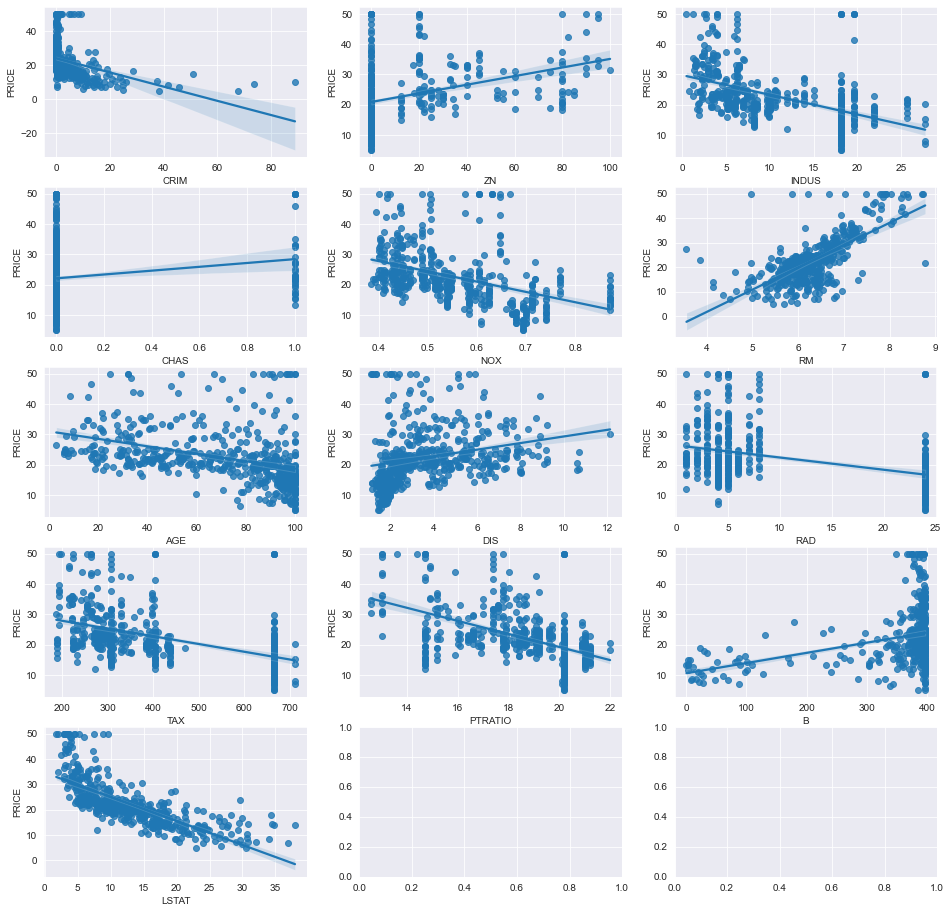

In [19]:
# 회귀 결과를 가지고 보스톤 주택 가격에 대한 회귀식
# PRICE = -0.11*crim + 0.07*zn + 0.03*indus + 3.05*chas - 19.80*nox + 3.35*rm + 0.01*age - 1.74*dis + 0.36*rad
#         - 0.01*tax - 0.92*ptratio + 0.01*b - 0.75*lastat + 41
# 회귀 분석 결과를 산점도, 선형 회귀 그래프로 시각화하기
# 피처 중에서 타깃인 PRICE를 제외한 13개 피처가 회귀 분석에 미치는 영향을 시각화
import seaborn as sns

fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)
x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, features in enumerate(x_features):
    print('i=', i, 'features=', features)
    row = int(i / 3)  # 몫
    col = i % 3  # 나머지
    sns.regplot(x=features, y='PRICE', data=boston_df, ax=axs[row][col])